# Convergent-Divergent nozzles

In this notebook I will plot the Mach number and ratios profiles along the centerline of a convergent-divergent nozzle. I will use the `De_Laval_Solver`.

In order to plot the ratios and Mach number along the length of a nozzle, we need to know:
* the properties of the gas flowing through the nozzle.
* the stagnation condition and the back pressure.
* the geometry of the nozzle. At the moment, two geometries are supported:
    1. `CD_Conical_Nozzle`: a simple conical divergent.
    2. `CD_TOP_Nozzle`: Rao's Thrust Optimized Parabolic contours.

Therefore, we need to import the following modules:

In [2]:
from pygasflow.utils.nozzles import CD_Conical_Nozzle, CD_TOP_Nozzle
from pygasflow.utils.common import Ideal_Gas, Flow_State
from pygasflow.solvers import De_Laval_Solver
import numpy as np

As an example, I'm going to consider air as the gas flowing through, and a stagnation condition at $T_{0}=303.15K$ and $P_{0} = 8 atm$.

In [3]:
# Initialize air as the gas to use in the nozzle
gas = Ideal_Gas(287, 1.4)

# stagnation condition
upstream_state = Flow_State(
    p0 = 8 * 101325,
    t0 = 303.15
)

We need to define the nozzle geometry. The only non-trivial part to understand is that the transition from one region to other should be smooth, therefore:
1. throat region (connecting the convergent with divergent):
    * `CD_TOP_Nozzle` dealt automatically with this region.
    * `CD_Conical_Nozzle`: we need to define a junction radius between the convergent and divergent.
2. the region between the "combustion chamber" and convergent. For both `CD_TOP_Nozzle` and `CD_Conical_Nozzle` we need to define a junction radius.

In [4]:
Ri = 0.5
Rt = 0.1
Re = 1

# Inlet Area
Ai = np.pi * Ri**2
# Exit (outlet) area
Ae = np.pi * Re**2
# Throat area
At = np.pi * Rt**2
# Convergent's Length
Lc = 0.75
# Divergent's Length
Ld = 3
# half cone angle
theta_N = 40

# Junction radius between the convergent and divergent
Rbt = 0.25 * Rt
# Junction radius between the "combustion chamber" and convergent
Rbc = 0.5 * Rt

geom_con = CD_Conical_Nozzle(
    Ai,            # Inlet area
    Ae,            # Exit (outlet) area
    At,            # Throat area
    Rbt / Rt,      # Junction radius ratio at the throat (between the convergent and divergent)
    Rbc / Rt,      # Junction radius ratio between the "combustion chamber" and convergent
    Lc,            # Convergent's Length
    Ld,            # Divergent's Length. If None, it will be computed from the half cone angle
    None,          # Half angle cone (in degrees). If None, it will be computed from the divergent's length
    1000           # Number of discretization points along the total length of the nozzle
)

# Convergent's Length
Lc = 0.75
# Junction radius between the "combustion chamber" and convergent
Rbc = 0.5 * Rt
# Angle [degrees] of the inflection point between the circular curve and the parabola on the divergent.
theta_N = 40
# Angle [degrees] of the inflection point at the exit area.
theta_e = 20

geom_top = CD_TOP_Nozzle(
    Ai,            # Inlet area
    Ae,            # Exit (outlet) area
    At,            # Throat area
    Rbc / Rt,      # Junction radius ratio between the "combustion chamber" and convergent
    Lc,            # Convergent's Length
    theta_N,       # Angle [degrees] of the inflection point between the circular curve and the parabola on the divergent.
    theta_e,       # Angle [degrees] of the inflection point at the exit area.
    1000           # Number of discretization points along the total length of the nozzle
)

At this point, I can initialize the solvers. By printing the nozzle, I will see a bunch of interesting data.

In [5]:
# Initialize the nozzle
nozzle_conical = De_Laval_Solver(gas, geom_con, upstream_state)
nozzle_top = De_Laval_Solver(gas, geom_top, upstream_state)
print(nozzle_conical, nozzle_top)

De Laval nozzle characteristics:
Geometry: C-D Conical Nozzle
Ai	0.7853981633974483
Ae	3.141592653589793
At	0.031415926535897934
Lc	0.75
Ld	3
L	3.75
theta_N	16.896671119721443
Critical Quantities:
T*	252.625
P*	428225.2171235414
rho*	5.906279771438798
u*	318.5980618271241
Important Pressure Ratios:
r1	0.9999765565527823
r2	0.01432606888033852
r3	0.0002559865580824722
Flow Condition: 	Undefined
Input state	State 
	M	0
	P	0
	T	0
	rho	0
	P0	810600
	T0	303.15

 De Laval nozzle characteristics:
Geometry: C-D TOP Nozzle
Ai	0.7853981633974483
Ae	3.141592653589793
At	0.031415926535897934
Lc	0.75
Ld	1.9781837420073283
L	2.728183742007328
theta_N	40
theta_e	20
Critical Quantities:
T*	252.625
P*	428225.2171235414
rho*	5.906279771438798
u*	318.5980618271241
Important Pressure Ratios:
r1	0.9999765565527823
r2	0.01432606888033852
r3	0.0002559865580824722
Flow Condition: 	Undefined
Input state	State 
	M	0
	P	0
	T	0
	rho	0
	P0	810600
	T0	303.15




Here I define a simple plot function.

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def Plot_Nozzle(geom, L, A, M, P, rho, T, flow_condition, Asw_At_ratio, title):
    fig, ax = plt.subplots(nrows=4, sharex=True)
    fig.set_size_inches(8, 10)
    radius_nozzle, radius_container = geom.Get_Points(False)
    ar_nozzle, ar_container = geom.Get_Points(True)

    # nozzle geometry
    ax[0].add_patch(patches.Polygon(radius_container, facecolor="0.85", hatch="///", edgecolor="0.4", linewidth=0.5))
    ax[0].add_patch(patches.Polygon(radius_nozzle, facecolor='#b7e1ff', edgecolor="0.4", linewidth=1))
    ax[0].set_xlim(min(radius_container[:, 0]), max(radius_container[:, 0]))
    ax[0].set_ylim(0, max(radius_container[:, 1]))
    ax[0].set_ylabel("r [m]")
    ax[0].set_title(title + flow_condition)

    ax[1].add_patch(patches.Polygon(ar_container, facecolor="0.85", hatch="///", edgecolor="0.4", linewidth=0.5))
    ax[1].add_patch(patches.Polygon(ar_nozzle, facecolor='#b7e1ff', edgecolor="0.4", linewidth=1))
    ax[1].set_xlim(min(ar_container[:, 0]), max(ar_container[:, 0]))
    ax[1].set_ylim(0, max(ar_container[:, 1]))
    ax[1].set_ylabel("$A/A^{*}$")

    # mach number
    ax[2].plot(L, M)
    ax[2].set_xlim(min(ar_container[:, 0]), max(ar_container[:, 0]))
    ax[2].set_ylim(0)
    ax[2].grid()
    ax[2].set_ylabel("M")

    # ratios
    ax[3].plot(L, P, label="$P/P_{0}$")
    ax[3].plot(L, rho, label=r"$\rho/\rho_{0}$")
    ax[3].plot(L, T, label="$T/T_{0}$")
    ax[3].set_xlim(min(ar_container[:, 0]), max(ar_container[:, 0]))
    ax[3].set_ylim(0, 1)
    ax[3].legend(loc="lower left")
    ax[3].grid()
    ax[3].set_xlabel("L [m]")
    ax[3].set_ylabel("ratios")

    plt.tight_layout()
    plt.show()

Finally, having chosen the Back to Stagnation pressure ratio, I run the computation on both nozzles and plot the results.

<IPython.core.display.Javascript object>


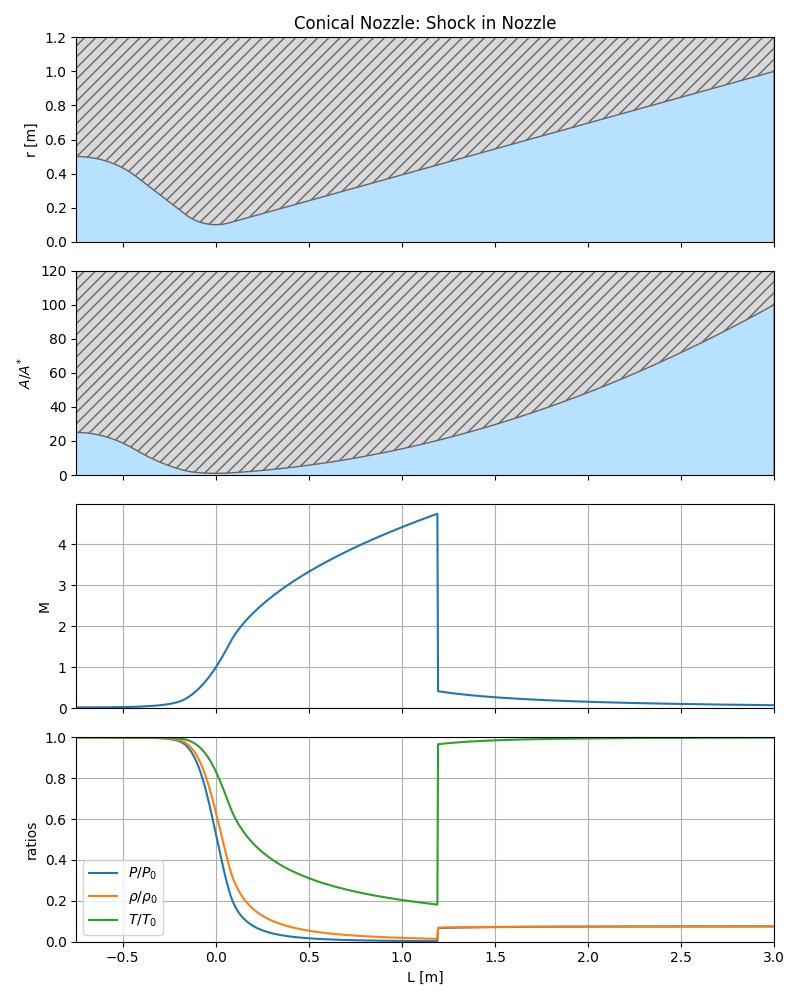

<IPython.core.display.Javascript object>


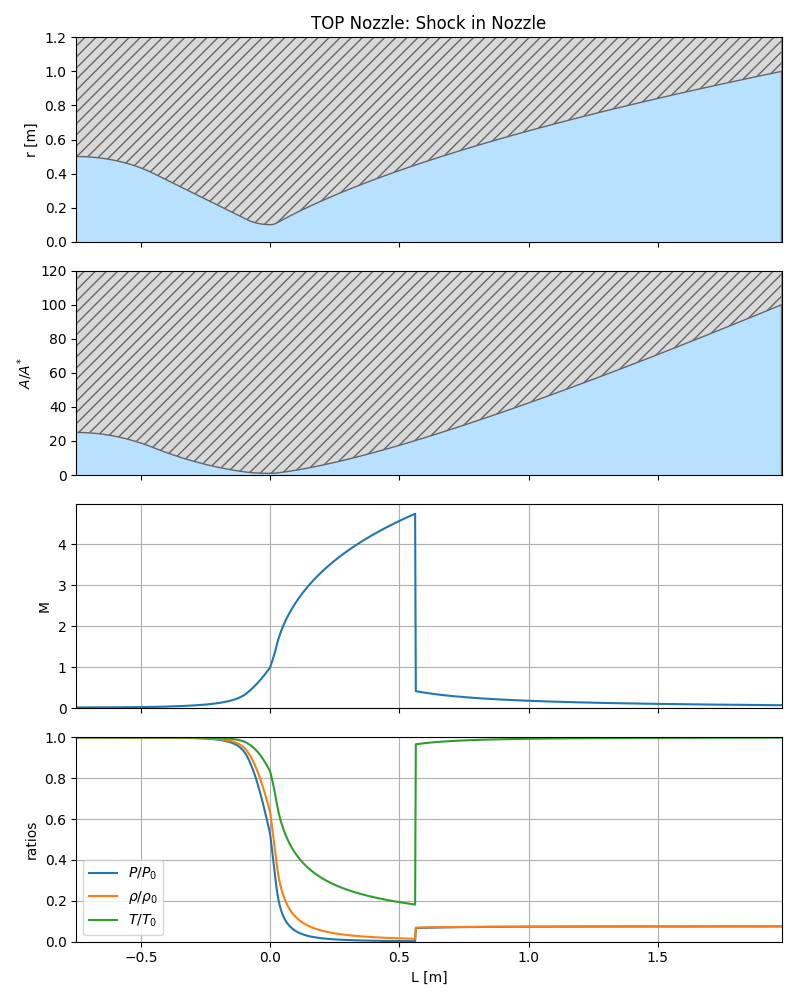

In [7]:
Pb_P0_ratio = 0.075
L1, A1, M1, P1, rho1, T1, flow_condition1, Asw_At_ratio1 = nozzle_conical.Compute(Pb_P0_ratio)
L2, A2, M2, P2, rho2, T2, flow_condition2, Asw_At_ratio2 = nozzle_top.Compute(Pb_P0_ratio)

Plot_Nozzle(geom_con, L1, A1, M1, P1, rho1, T1, flow_condition1, Asw_At_ratio1, "Conical Nozzle: ")
Plot_Nozzle(geom_top, L2, A2, M2, P2, rho2, T2, flow_condition2, Asw_At_ratio2, "TOP Nozzle: ")